In [20]:
# -*- coding: utf-8 -*-
import pandas as pd
from textblob import TextBlob
import nltk
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

#nltk.download()

In [31]:
data_ = pd.read_csv('data/find2.csv')
data_a = pd.read_csv('data/find2a.csv')
data_b = pd.read_csv('data/find2b.csv')

In [32]:
data_['exp'] = 'fiveMT'
data_a['exp'] = 'tenMT'
data_b['exp'] = 'sevenMT'

In [33]:
all_data = pd.concat([data_, data_a, data_b], ignore_index=True)

In [34]:
def analyze_description(df):
    adj = 0
    prep = 0
    noun = 0
    text = unicode(df.updated, "utf-8")
    pos = TextBlob(text).tags
    for part in pos:
        #print part
        if part[1] in ['IN']:
            prep += 1
        if part[1] in ['JJ', 'JJR', 'JJS']:
            adj += 1
        if part[1] in ['NN', 'NNP','NNPS','NNS']:
            noun += 1
    
    df['adj'] = adj
    df['prep'] = prep
    df['noun'] = noun
    
    return df

In [35]:
def nameToIndex(name):
    if name == 'fiveMT':
        return 0
    if name == 'sevenMT':
        return 1
    if name == 'tenMT':
        return 2

In [36]:
descrip_ = pd.read_csv('data/descriptions2.csv')
descrip_a = pd.read_csv('data/descriptions2a.csv')
descrip_b = pd.read_csv('data/descriptions2b.csv')

In [37]:
descrip_['exp'] = 'fiveMT'
descrip_a['exp'] = 'tenMT'
descrip_b['exp'] = 'sevenMT'

In [38]:
all_descrip = pd.concat([descrip_, descrip_a, descrip_b], ignore_index=True)

In [ ]:
#df = all_descrip.apply(analyze_description, axis = 1)

In [43]:
df2 = all_data.apply(analyze_description, axis = 1)

In [46]:
#df['exp_index'] = df.exp.apply(nameToIndex)
df2['exp_index'] = df2.exp.apply(nameToIndex)

In [42]:
#df.to_csv('descriptions_syntax.csv')

In [47]:
df2.to_csv('all_descriptions_syntax.csv')

In [49]:
# f, axs = plt.subplots(3,3, figsize=(20,20))
# '''
# ax = f.add_subplot(111)
# # Turn off axis lines and ticks of the big subplot
# ax.spines['top'].set_color('none')
# ax.spines['bottom'].set_color('none')
# ax.spines['left'].set_color('none')
# ax.spines['right'].set_color('none')
# ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')

# # Set common labels
# ax.set_xlabel('common xlabel')
# ax.set_ylabel('common ylabel')
# '''

# for i, row in enumerate(axs):
#     for j, ax in enumerate(row):
#         ax.plot(df[(df.trial == j)&(df.exp_index == i)].gen,
#                    df[(df.trial == j)&(df.exp_index == i)].adj, lw=1, marker='o')
#         ax.plot(df[(df.trial == j)&(df.exp_index == i)].gen,
#                    df[(df.trial == j)&(df.exp_index == i)].prep, lw=1, marker='o')
#         ax.plot(df[(df.trial == j)&(df.exp_index == i)].gen,
#                    df[(df.trial == j)&(df.exp_index == i)].noun, lw=1, marker='o')
#         ax.set_xlim([-.5,3.5])
#         ax.set_xticks(range(0,4))
#         ax.set_ylim([0,18])
#         ax.set_yticks(range(0,20,4))
#         #ax.set_title('%i and %i' % (i,j))
#         #ax.set_xlabel('Cycle')
#         #ax.set_ylabel('Word count')
        
# ax.legend(bbox_to_anchor=(-2.9, -.2), loc='lower left', borderaxespad=0., fontsize=20)
#          # it will place the legend on the outer right-hand side of the last axes
        
# f.text(0.5, 0.08, 'Cycle', ha='center', size=20)

# f.text(0.23, 0.9, 'Urban', ha='center', size=14)
# f.text(0.5, 0.9, 'Suburban', ha='center', size=14)
# f.text(0.77, 0.9, 'Rural', ha='center', size=14)

# f.text(0.05, 0.5, 'Word count', va='center', rotation='vertical', size=20)

# f.text(0.09, 0.23, '10 turkers', ha='center', rotation='vertical', size=14)
# f.text(0.09, 0.5, '7 turkers', ha='center', rotation='vertical', size=14)
# f.text(0.09, 0.77, '5 turkers', ha='center', rotation='vertical', size=14)

# f.show()

/Users/brianho/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


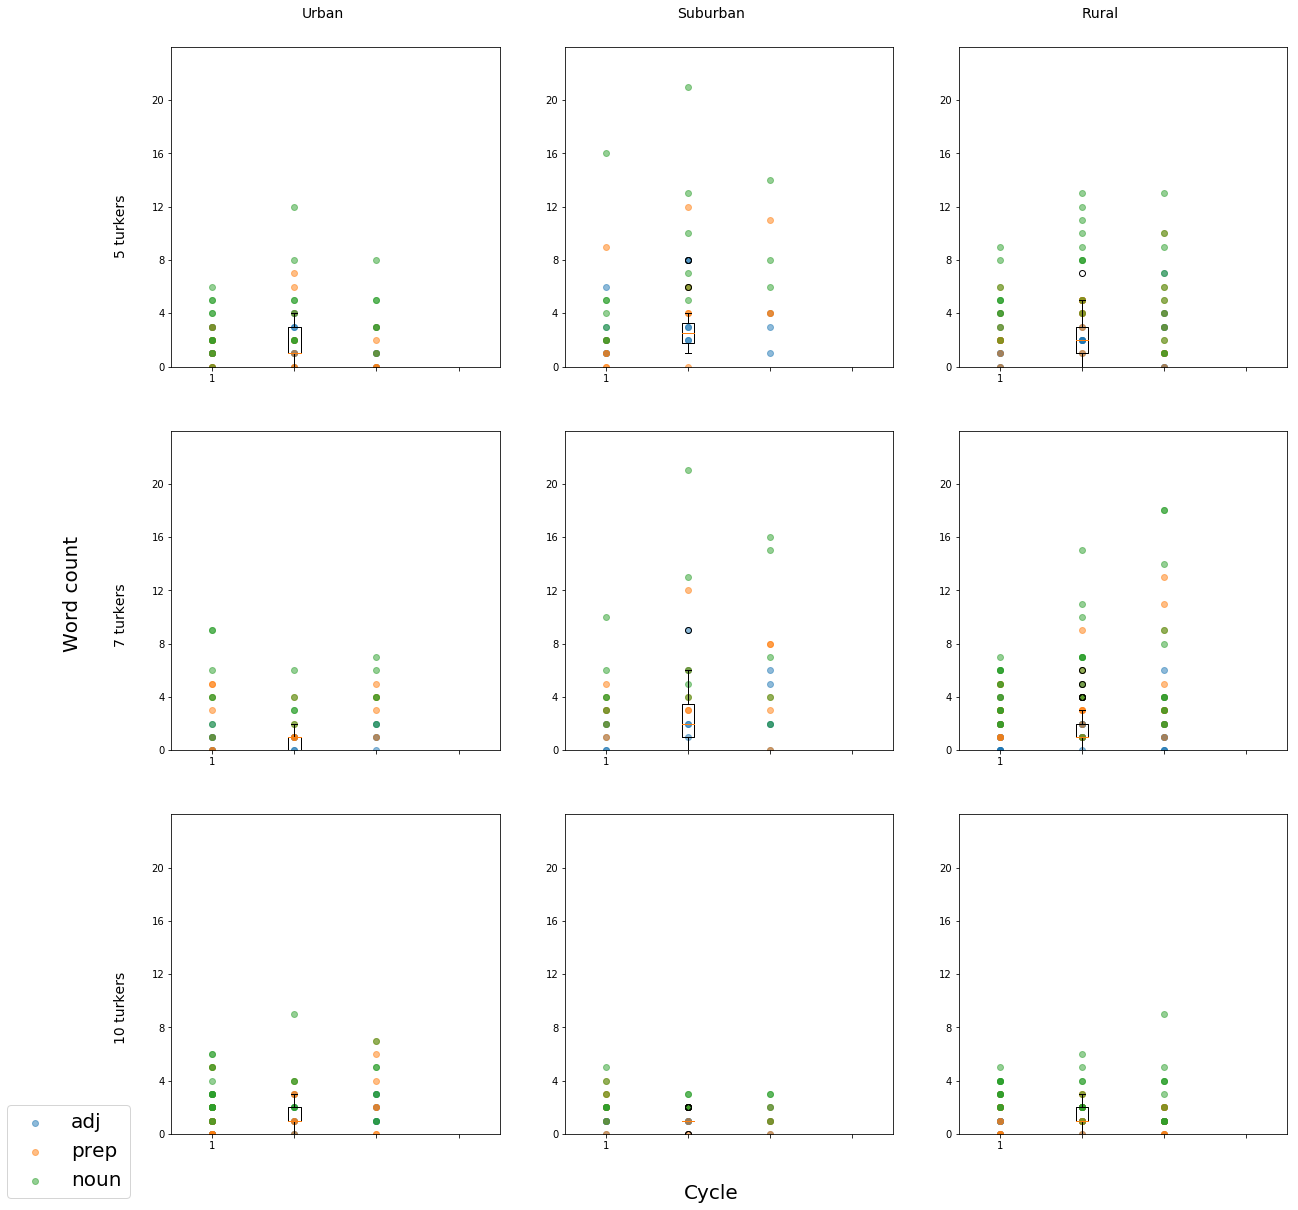

In [50]:
f, axs = plt.subplots(3,3, figsize=(20,20))
for i, row in enumerate(axs):
    for j, ax in enumerate(row):
        ax.boxplot(df2[(df2.trial == i)&(df2.exp_index == j)].adj)
        ax.scatter(df2[(df2.trial == i)&(df2.exp_index == j)].gen,
                   df2[(df2.trial == i)&(df2.exp_index == j)].adj, alpha = .5)
        ax.scatter(df2[(df2.trial == i)&(df2.exp_index == j)].gen,
                   df2[(df2.trial == i)&(df2.exp_index == j)].prep, alpha = .5)
        ax.scatter(df2[(df2.trial == i)&(df2.exp_index == j)].gen,
                   df2[(df2.trial == i)&(df2.exp_index == j)].noun, alpha = .5)
        ax.set_xlim([-.5,3.5])
        ax.set_xticks(range(0,4))
        ax.set_ylim([0,24])
        ax.set_yticks(range(0,24,4))
        #ax.set_title('%i and %i' % (i,j))
        #ax.set_xlabel('Cycle')
        #ax.set_ylabel('Word count')
        
ax.legend(bbox_to_anchor=(-2.9, -.2), loc='lower left', borderaxespad=0., fontsize=20)
         # it will place the legend on the outer right-hand side of the last axes
        
f.text(0.5, 0.08, 'Cycle', ha='center', size=20)

f.text(0.23, 0.9, 'Urban', ha='center', size=14)
f.text(0.5, 0.9, 'Suburban', ha='center', size=14)
f.text(0.77, 0.9, 'Rural', ha='center', size=14)

f.text(0.05, 0.5, 'Word count', va='center', rotation='vertical', size=20)

f.text(0.09, 0.23, '10 turkers', ha='center', rotation='vertical', size=14)
f.text(0.09, 0.5, '7 turkers', ha='center', rotation='vertical', size=14)
f.text(0.09, 0.77, '5 turkers', ha='center', rotation='vertical', size=14)

f.show()